In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

In [19]:
df = pd.read_csv(r'C:\Users\msi thin\Desktop\recommender\final_data.csv')
df

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,language
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3,6
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4,6
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4,6
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4,6
4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160193,Kanye West,I Love It (& Lil Pump),4S8d14HvHb70ImctNgVzQQ,72,2018,chicago rap,0.901,0.522,2,-8.304,1,0.3300,0.0114,0.000000,0.2590,0.329,104.053,127946,4,6
1160194,Rihanna,FourFiveSeconds,78TTtXnFQPzwqlbtbwqN0y,80,2015,pop,0.582,0.272,2,-5.662,1,0.0501,0.8750,0.000000,0.1300,0.354,205.846,188238,4,6
1160195,Kanye West,FML,30Zcjs7pgEkmJA1lEbGSWT,64,2016,rap,0.527,0.415,5,-7.184,1,0.1310,0.3290,0.000000,0.1950,0.120,125.357,236120,4,6
1160196,¥$,PAPERWORK,2yyO7EKRr7c3txi4xCXUFk,77,2024,chicago rap,0.741,0.488,8,-5.308,1,0.0556,0.0703,0.000009,0.0821,0.186,120.839,145785,4,6


DISTRIBUTION OF SONGS PER YEAR

Text(0.5, 1.0, 'Number of song per year')

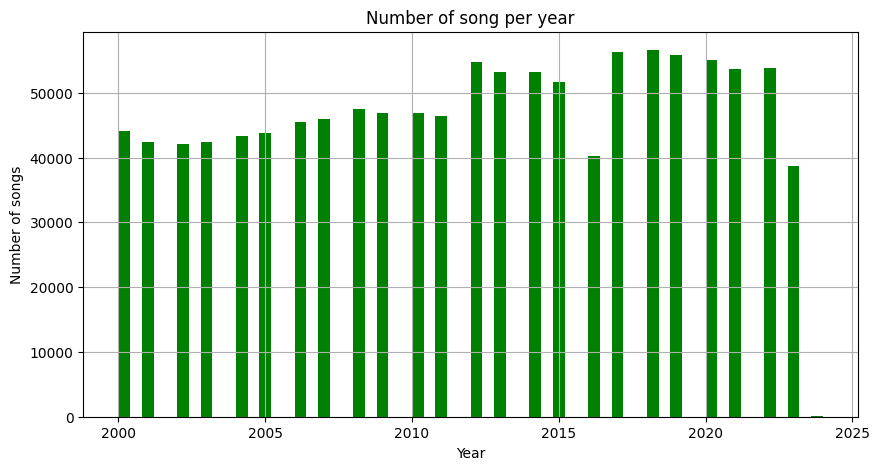

In [3]:
df['year'].hist(bins=60, figsize=(10,5), color='green')
plt.xlabel('Year')
plt.ylabel('Number of songs')
plt.title('Number of song per year')

#it can clearly be observed that number of songs has grown since 2010
#2024 has about 500 songs, which is the manually collected data
#generally the data is distributed uniformly

OBSERVING THE MOST SPREAD GENRES

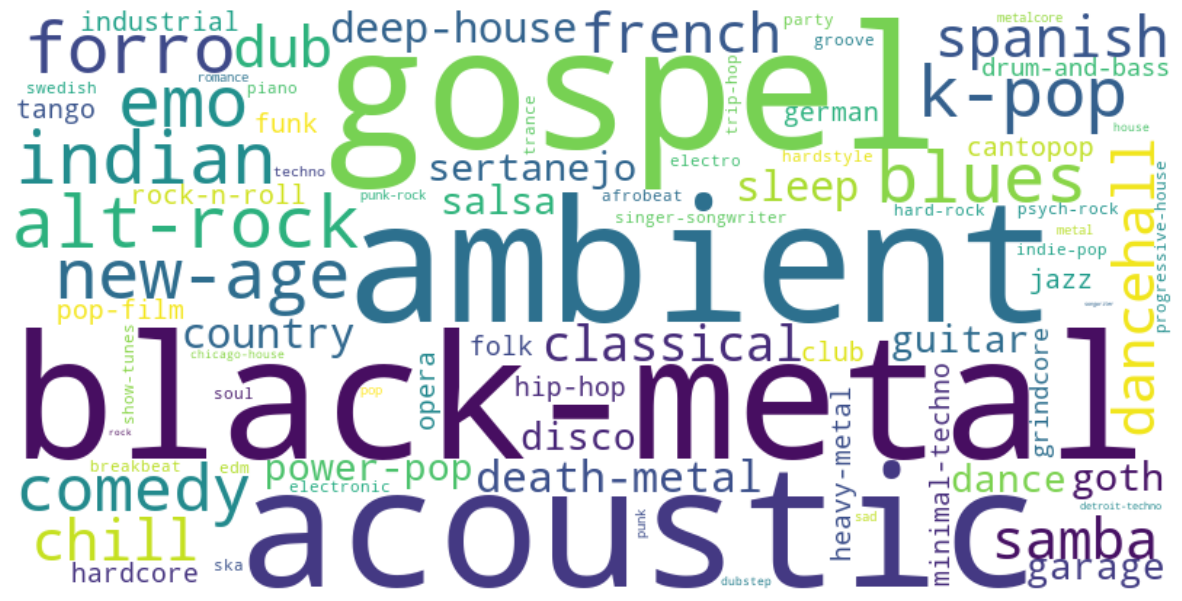

In [14]:
genres = df['genre'].tolist()
word_could_dict = Counter(genres) #create a dictionary of genres and their frequency
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate_from_frequencies(word_could_dict)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#unfortunately we can observe that genres such as ambient, acoustic, black-metal are spread a lot compared to other genres

LANGUAGE DISTRIBUTION

In [20]:
language_mapping = {
    6: 'English',
    5: 'Russian',
    4: 'Azerbaijani/Turkish',
    3: 'French/Italian',
    2: 'Spanish/Portuguese',
    1: 'Japanese',
    0: 'Korean'
}

df['language'].map(language_mapping).value_counts()
#we can observe that most of the songs are in English, which is expected
#but having little amount of songs in other languages is a problem
#since we recommend from the dataset only

English                1131927
French/Italian           16441
Russian                   7403
Spanish/Portuguese        3042
Japanese                  1125
Azerbaijani/Turkish        260
Name: language, dtype: int64

POPULARITY DISTRIBUTION

Text(0, 0.5, 'Number of songs')

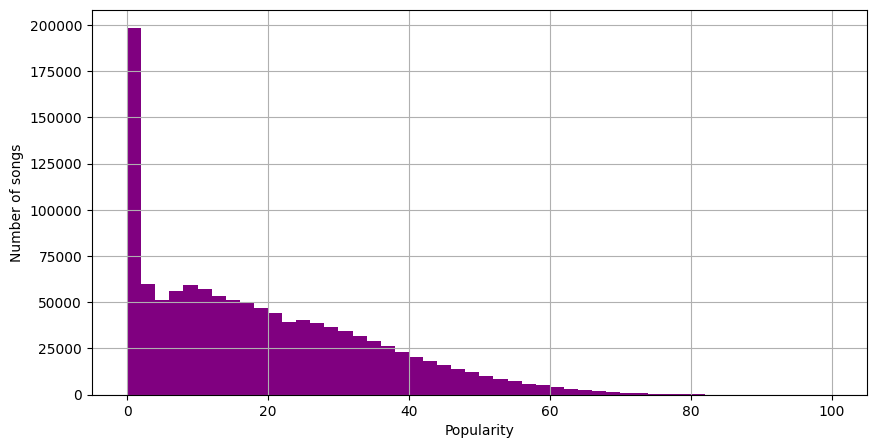

In [24]:
#give a histogram of song popularity in the dataset
df['popularity'].hist(bins=50, figsize=(10,5), color='purple')
plt.xlabel('Popularity')
plt.ylabel('Number of songs')

#most of the songs in the dataset have a very low popularity score

In [36]:
df[df['popularity'] > 90] #there are only 19 songs with a popularity score higher than 90

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,language
77591,Arctic Monkeys,I Wanna Be Yours,5XeFesFbtLpXzIVDNQP22n,91,2013,garage,0.464,0.417,0,-9.345,0,0.0256,0.13600,0.022000,0.0974,0.479,67.528,183956,4,6
541562,David Guetta,I'm Good (Blue),4uUG5RXrOk84mYEfFvj3cK,93,2022,dance,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,175238,4,6
560179,Yandel,Yandel 150,2oiixB9QMIzhWaHGVlQx4g,91,2022,hip-hop,0.783,0.729,6,-3.549,0,0.0691,0.04920,0.000272,0.1000,0.580,167.968,216148,4,6
560185,Bizarrap,"Quevedo: Bzrp Music Sessions, Vol. 52",2tTmW7RDtMQtBk7m2rYeSw,92,2022,hip-hop,0.621,0.782,2,-5.548,1,0.0440,0.01250,0.033000,0.2300,0.550,128.033,198938,4,6
568425,OneRepublic,I Ain't Worried,4h9wh7iOZ0GGn8QVp4RAOB,91,2022,piano,0.704,0.797,0,-5.927,1,0.0475,0.08260,0.000745,0.0546,0.825,139.994,148486,4,6
569169,SZA,Kill Bill,1Qrg8KqiBpW07V7PNxwwwL,94,2022,pop,0.644,0.735,8,-5.747,1,0.0391,0.05210,0.144000,0.1610,0.418,88.980,153947,4,6
569172,Taylor Swift,Anti-Hero,0V3wPSX9ygBnCm8psDIegu,92,2022,pop,0.637,0.643,4,-6.571,1,0.0519,0.13000,0.000002,0.1420,0.533,97.008,200690,4,6
569173,d4vd,Here With Me,78Sw5GDo6AlGwTwanjXbGh,92,2022,pop,0.574,0.469,4,-8.209,1,0.0254,0.53400,0.000092,0.1280,0.288,132.023,242485,4,6
569175,Sam Smith,Unholy (feat. Kim Petras),3nqQXoyQOWXiESFLlDF1hG,92,2022,pop,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.2660,0.238,131.121,156943,4,6
569176,Rema,Calm Down (with Selena Gomez),0WtM2NBVQNNJLh6scP13H8,93,2022,pop,0.801,0.806,11,-5.206,1,0.0381,0.38200,0.000669,0.1140,0.802,106.999,239318,4,6


CHECKING WHAT GENRE WAS THE MOST POPULAR FOR EVERY YEAR

In [43]:
df.loc[df.groupby('year')['popularity'].idxmax(), ['year', 'genre']]

,year,genre
645955,2000,hip-hop
693888,2001,metal
732724,2002,hip-hop
779167,2003,metal
817962,2004,hip-hop
845619,2005,dance
889660,2006,dance
946063,2007,garage
1010855,2008,rock
1047454,2009,hip-hop
